In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
pipeline = joblib.load("../models/linear_model.pkl")

In [4]:
df = pd.read_csv("../data/processed.csv.gz", compression='gzip')

In [5]:
df['Year'] = df['Year'].astype(int)

train_df = df[df['Year'] < 2020]
test_df = df[df['Year'] >= 2020]

X_train = train_df.drop(columns=['AveragePrice'])
y_train = train_df['AveragePrice']

X_test = test_df.drop(columns=['AveragePrice'])
y_test = test_df['AveragePrice']

In [6]:
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

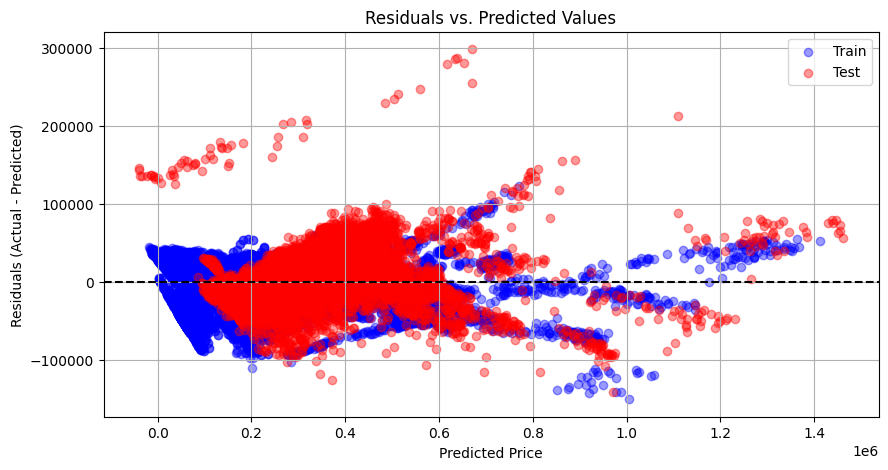

In [7]:
plt.figure(figsize=(10, 5))
plt.scatter(y_train_pred, train_residuals, alpha=0.4, label='Train', color='blue')
plt.scatter(y_test_pred, test_residuals, alpha=0.4, label='Test', color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

- Model is fairly evenly spread around 0, which is good.
- A few noticeable outliers in the test set at lower prices.

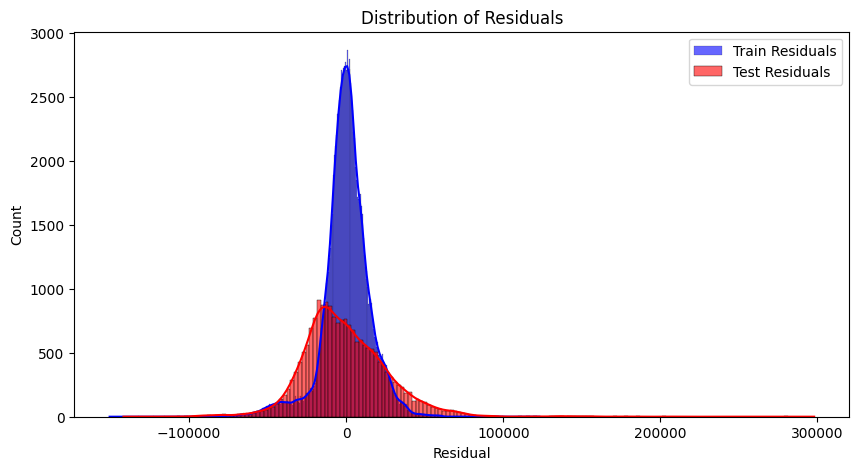

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(train_residuals, kde=True, label='Train Residuals', alpha=0.6, color='blue')
sns.histplot(test_residuals, kde=True, label='Test Residuals', alpha=0.6, color='red')
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.legend()
plt.show()

- Normal distribution of residuals for both train and test sets - ideal.
- Indicative of good generalization, with a slight tendency to underpredict.
- Model occasionally makes large errors, indicated by long tails. Infrequent.

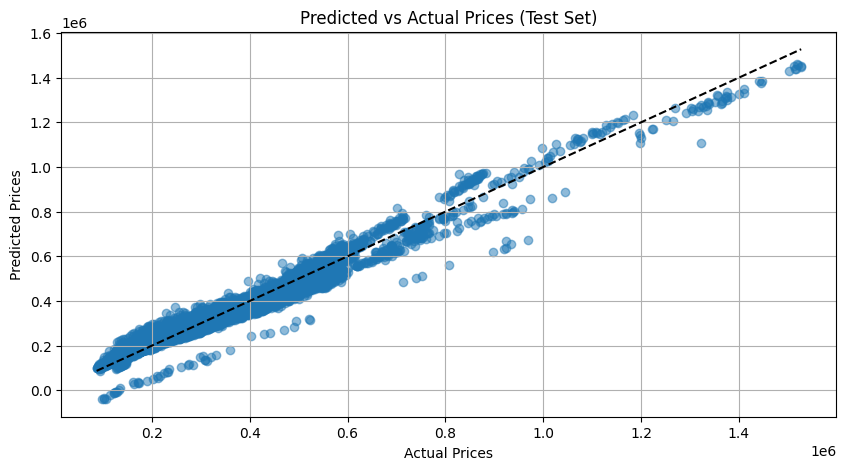

In [9]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices (Test Set)')
plt.grid(True)
plt.show()

- Points closely hugging diagonal indicates good predictions.
- Slight systematic bias for expensive homes, model underpredicts homes above 1.2 million.

In [12]:
print('Train Set Metrics:')
print(f"R2 Score: {r2_score(y_train, y_train_pred):.4f}")
print(f"RMSE: {mean_squared_error(y_train, y_train_pred)**0.5:.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_train_pred):.2f}")
print('-' * 40)

print('Test Set Metrics:')
print(f"R2 Score: {r2_score(y_test, y_test_pred):.4f}")
print(f"RMSE: {mean_squared_error(y_test, y_test_pred)**0.5:.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred):.2f}")
print('-' * 40)

Train Set Metrics:
R2 Score: 0.9787
RMSE: 15530.33
MAE: 10714.73
----------------------------------------
Test Set Metrics:
R2 Score: 0.9615
RMSE: 27751.87
MAE: 20659.18
----------------------------------------


- R2 score of 0.96 on test set indicates good predictions.
- RMSE of 27752 and MAE of 20659, relatively small compared to the true house prices.
    - Noticeable difference in errors on test set, possibly overfitting.

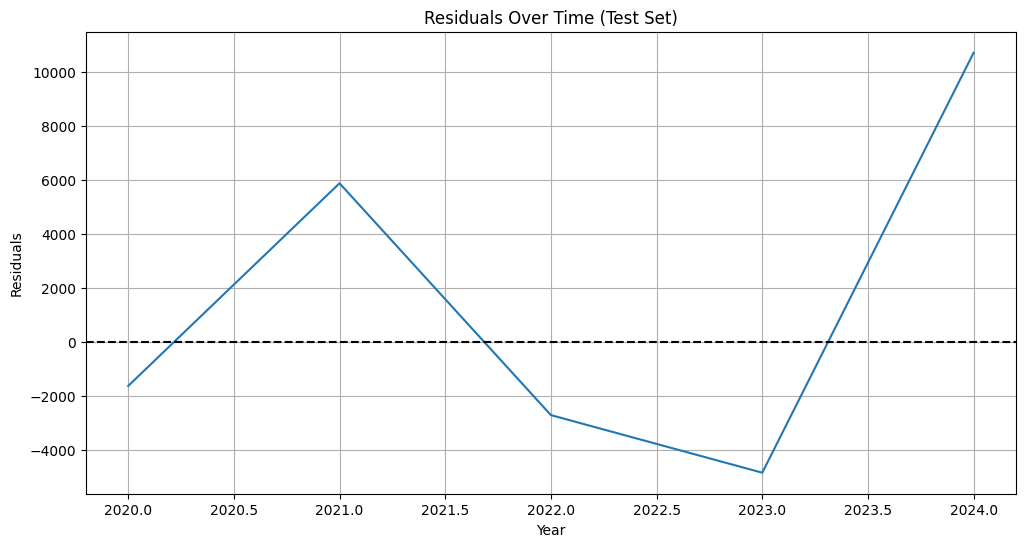

In [16]:
df_test_plot = X_test.copy()
df_test_plot['Actual'] = y_test
df_test_plot['Predicted'] = y_test_pred
df_test_plot['Residuals'] = df_test_plot['Actual'] - df_test_plot['Predicted']

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_test_plot, x='Year', y='Residuals', errorbar=None)
plt.axhline(0, linestyle='--', color='black')
plt.title('Residuals Over Time (Test Set)')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

- Fluctuation of 10k is small considering price scale - no sign of performance drift.

## Insights

- Model captures most of the variance in housing prices.
- No major overfitting, despite a slight performance dip on the test set.
- Model struggles slightly with:
    - Outlier properties (extremely expensive).
    - Possibly rare combinations.
- No serious time-based degredation, which is important for forecasting reliability.